# TESTANDO MODELOS NAS VARIÁVEIS TODOS OS TEMAS

####  esse script roda a base da Mariana com e sem ponderação por balanceamento.

In [2]:
# FUNÇÃO PARA VERIFICAR A QUANTIDADE DE DADOS FALTANTES

def missing_data_info(data):
    missing_count = data.isnull().sum()
    missing_percent = 100 * data.isnull().mean()
    data_types = data.dtypes
    missing_info = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percent': missing_percent,
        'Data Type': data_types
    })

    return missing_info.sort_values(by='Missing Percent', ascending=False)

# missing_data_info(df)

In [8]:
# Load the datasets

pd.set_option('display.max_columns', 170)
pd.set_option('display.max_rows', 170)

df = pd.read_csv('bases/df_modelo.csv')

df

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,ind_parc_mds_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,classe_renda,rf_idade,rf_trab_principal,rf_com_deficiencia,rf_trab_agricultura,rf_sexo,rf_curso_frequentou,rf_curso_frequenta,rf_trabalhou_semana,rf_cor_raca,rf_concluiu_curso,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_adulto_nunca_freq_escola,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
0,42,2,268503,1.0,5.0,5.0,1.0,0.0,4,5128.0,102,0.0,38,6.0,2,1.0,2,4.0,-1.0,1.0,1.0,1.0,0.250000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.25,0.0,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.250000,0.5,0.0,6.3
1,29,3,2888440,2.0,2.0,2.0,1.0,0.0,2,2646.0,151,0.0,27,-1.0,2,-1.0,2,8.0,-1.0,2.0,4.0,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,5.1
2,35,3,2113517,1.0,5.0,5.0,1.0,0.0,2,5979.0,482,2.0,46,6.0,2,2.0,2,4.0,-1.0,1.0,4.0,1.0,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,5.7
3,33,2,4419096,1.0,3.0,5.0,1.0,0.0,2,238.0,238,0.0,34,-1.0,2,-1.0,2,8.0,-1.0,2.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,4.7
4,28,1,4241219,1.0,4.0,5.0,1.0,0.0,1,5500.0,17,0.0,56,-1.0,2,-1.0,2,5.0,-1.0,2.0,4.0,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96497,35,1,5181019,1.0,2.0,5.0,2.0,0.0,3,1643.0,438,0.0,25,1.0,2,2.0,2,8.0,-1.0,1.0,1.0,1.0,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.00,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0,6.3
96498,23,2,3853705,1.0,2.0,5.0,6.0,0.0,2,479.0,479,0.0,18,-1.0,2,-1.0,2,5.0,-1.0,2.0,4.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,5.8
96499,29,3,1232994,1.0,6.0,5.0,1.0,0.0,2,843.0,836,2.0,68,-1.0,2,-1.0,1,-1.0,-1.0,2.0,4.0,-1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.50,0.0,0.000000,0.0,0.5,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,4.5
96500,31,3,1330889,1.0,5.0,5.0,1.0,0.0,3,2679.0,628,0.0,37,-1.0,2,-1.0,2,8.0,-1.0,2.0,4.0,2.0,0.333333,0.000000,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.00,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,0.0,6.2


In [9]:
# Deletar a coluna id_familia do DataFrame df
df = df.drop(columns=['id_familia'])

In [10]:
df.columns

Index(['uf_ibge', 'classf', 'cod_local_domic_fam', 'qtd_comodos_domic_fam',
       'cod_material_piso_fam', 'cod_iluminacao_domic_fam', 'ind_parc_mds_fam',
       'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao',
       'classe_renda', 'rf_idade', 'rf_trab_principal', 'rf_com_deficiencia',
       'rf_trab_agricultura', 'rf_sexo', 'rf_curso_frequentou',
       'rf_curso_frequenta', 'rf_trabalhou_semana', 'rf_cor_raca',
       'rf_concluiu_curso', 'pct_extrativista', 'pct_conta_propria',
       'pct_trab_rural_temporario', 'pct_empregado_sem_carteira',
       'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira',
       'pct_militar_servidor', 'pct_trabalho_12meses_adulto',
       'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca',
       'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica',
       'pct_freq_particular', 'pct_adulto_nunca_freq_escola',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes'

In [11]:

var_categoricas = ['uf_ibge', 'classf', 'cod_local_domic_fam', 'cod_material_piso_fam', 
                       'cod_iluminacao_domic_fam', 'ind_parc_mds_fam',
                       'ind_parc_mds_fam_0_1']

In [12]:
print(f'Shape antes: {df.shape}')

df_encoded = pd.get_dummies(df, columns=var_categoricas, dummy_na=False)

print(f'Shape depois: {df_encoded.shape}')

df_encoded

Shape antes: (96502, 45)
Shape depois: (96502, 102)


,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,classe_renda,rf_idade,rf_trab_principal,rf_com_deficiencia,rf_trab_agricultura,rf_sexo,rf_curso_frequentou,rf_curso_frequenta,rf_trabalhou_semana,rf_cor_raca,rf_concluiu_curso,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_adulto_nunca_freq_escola,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ideb_2017_municipio,uf_ibge_11,uf_ibge_12,uf_ibge_13,uf_ibge_14,uf_ibge_15,uf_ibge_16,uf_ibge_17,uf_ibge_21,uf_ibge_22,uf_ibge_23,uf_ibge_24,uf_ibge_25,uf_ibge_26,uf_ibge_27,uf_ibge_28,uf_ibge_29,uf_ibge_31,uf_ibge_32,uf_ibge_33,uf_ibge_35,uf_ibge_41,uf_ibge_42,uf_ibge_43,uf_ibge_50,uf_ibge_51,uf_ibge_52,uf_ibge_53,classf_1,classf_2,classf_3,cod_local_domic_fam_1.0,cod_local_domic_fam_2.0,cod_local_domic_fam_9.0,cod_material_piso_fam_-1.0,cod_material_piso_fam_1.0,cod_material_piso_fam_2.0,cod_material_piso_fam_3.0,cod_material_piso_fam_4.0,cod_material_piso_fam_5.0,cod_material_piso_fam_6.0,cod_material_piso_fam_7.0,cod_iluminacao_domic_fam_-1.0,cod_iluminacao_domic_fam_1.0,cod_iluminacao_domic_fam_2.0,cod_iluminacao_domic_fam_3.0,cod_iluminacao_domic_fam_4.0,cod_iluminacao_domic_fam_5.0,cod_iluminacao_domic_fam_6.0,ind_parc_mds_fam_0.0,ind_parc_mds_fam_9.0,ind_parc_mds_fam_101.0,ind_parc_mds_fam_201.0,ind_parc_mds_fam_202.0,ind_parc_mds_fam_203.0,ind_parc_mds_fam_204.0,ind_parc_mds_fam_205.0,ind_parc_mds_fam_301.0,ind_parc_mds_fam_302.0,ind_parc_mds_fam_303.0,ind_parc_mds_fam_304.0,ind_parc_mds_fam_305.0,ind_parc_mds_fam_306.0,ind_parc_mds_fam_0_1_0.0,ind_parc_mds_fam_0_1_1.0
0,5.0,4,5128.0,102,0.0,38,6.0,2,1.0,2,4.0,-1.0,1.0,1.0,1.0,0.250000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.25,0.0,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.250000,0.5,6.3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,2.0,2,2646.0,151,0.0,27,-1.0,2,-1.0,2,8.0,-1.0,2.0,4.0,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,5.1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,5.0,2,5979.0,482,2.0,46,6.0,2,2.0,2,4.0,-1.0,1.0,4.0,1.0,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,5.7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,3.0,2,238.0,238,0.0,34,-1.0,2,-1.0,2,8.0,-1.0,2.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,4.7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,Fal

In [13]:
# Dividir os dados em treino e teste

# Selecionando variáveis preditoras e target
X = df.drop(columns=['classe_renda'])
y = df['classe_renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
X

,uf_ibge,classf,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,ind_parc_mds_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,rf_idade,rf_trab_principal,rf_com_deficiencia,rf_trab_agricultura,rf_sexo,rf_curso_frequentou,rf_curso_frequenta,rf_trabalhou_semana,rf_cor_raca,rf_concluiu_curso,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_adulto_nunca_freq_escola,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
0,42,2,1.0,5.0,5.0,1.0,0.0,4,5128.0,102,38,6.0,2,1.0,2,4.0,-1.0,1.0,1.0,1.0,0.250000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.25,0.0,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.250000,0.5,0.0,6.3
1,29,3,2.0,2.0,2.0,1.0,0.0,2,2646.0,151,27,-1.0,2,-1.0,2,8.0,-1.0,2.0,4.0,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,5.1
2,35,3,1.0,5.0,5.0,1.0,0.0,2,5979.0,482,46,6.0,2,2.0,2,4.0,-1.0,1.0,4.0,1.0,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,5.7
3,33,2,1.0,3.0,5.0,1.0,0.0,2,238.0,238,34,-1.0,2,-1.0,2,8.0,-1.0,2.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,4.7
4,28,1,1.0,4.0,5.0,1.0,0.0,1,5500.0,17,56,-1.0,2,-1.0,2,5.0,-1.0,2.0,4.0,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96497,35,1,1.0,2.0,5.0,2.0,0.0,3,1643.0,438,25,1.0,2,2.0,2,8.0,-1.0,1.0,1.0,1.0,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.00,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0,6.3
96498,23,2,1.0,2.0,5.0,6.0,0.0,2,479.0,479,18,-1.0,2,-1.0,2,5.0,-1.0,2.0,4.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,5.8
96499,29,3,1.0,6.0,5.0,1.0,0.0,2,843.0,836,68,-1.0,2,-1.0,1,-1.0,-1.0,2.0,4.0,-1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.50,0.0,0.000000,0.0,0.5,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,4.5
96500,31,3,1.0,5.0,5.0,1.0,0.0,3,2679.0,628,37,-1.0,2,-1.0,2,8.0,-1.0,2.0,4.0,2.0,0.333333,0.000000,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.00,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,0.0,6.2


In [15]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X shape: (96502, 44)
y shape: (96502,)
X_train shape: (77201, 44)
y_train shape: (77201,)
X_test shape: (19301, 44)
y_test shape: (19301,)


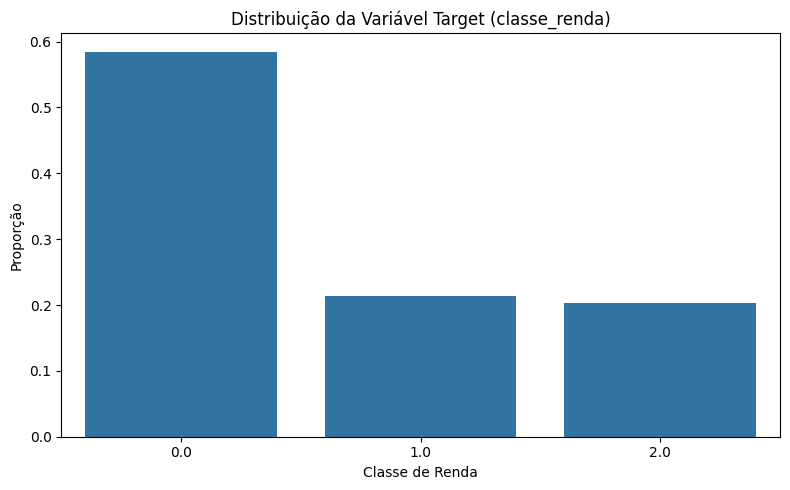

In [19]:
# Verificar a distribuição da variável target
target_distribution = y.value_counts(normalize=True)

plt.figure(figsize=(8, 5))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda)')
plt.xlabel('Classe de Renda')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [28]:
# ESTIMAÇÃO PADRÃO

from matplotlib.pylab import f
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Separando dados em folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Criando os modelos
models = {
    'Logistic': LogisticRegression(max_iter=2000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(silent=True)
}

# Avaliando e treinando cada modelo
for model_name, model in models.items():
    print(f"Avaliando modelo: {model_name}")
    
    # Normalizando os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)  # Ajusta e transforma dados de treinamento
    X_test_scaled = scaler.transform(X_test)  # Aplica a transformação nos dados de teste
    
    # Avaliando o modelo com validação cruzada
    scores = cross_val_score(model, X_scaled, y_train, cv=skf, scoring='accuracy')
    print("Scores de validação cruzada:", scores)
    print("Acurácia média:", scores.mean())
    
    # Treinando o modelo e fazendo previsões
    model.fit(X_scaled, y_train)  # Treinando o modelo
    y_pred = model.predict(X_test_scaled)  # Fazendo previsões
    
    # Avaliar o modelo
    print("Relatório de classificação:")
    print(classification_report(y_test, y_pred))
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("-" * 50)  # Separador entre os modelos


Avaliando modelo: Logistic
Scores de validação cruzada: [0.75811152 0.75304404 0.75408031 0.75693005 0.75718912]
Acurácia média: 0.7558710089181182
Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85     11275
         1.0       0.62      0.32      0.42      4120
         2.0       0.72      0.73      0.73      3906

    accuracy                           0.76     19301
   macro avg       0.71      0.66      0.66     19301
weighted avg       0.74      0.76      0.73     19301

Acurácia: 0.7559193824154189
--------------------------------------------------
Avaliando modelo: KNN
Scores de validação cruzada: [0.74489994 0.74993523 0.74507772 0.74689119 0.74268135]
Acurácia média: 0.7458970867883198
Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84     11275
         1.0       0.55      0.39      0.46      4120
         2.0       0.75      

In [27]:
# ESTIMAÇÃO COM PESO NAS CLASSES

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight

# Separando dados em folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calcular os pesos das classes para lidar com o desbalanceamento
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Criando os modelos
models = {
    'Logistic': LogisticRegression(class_weight=class_weights_dict, max_iter=2000),
    'KNN': KNeighborsClassifier(class_weight=class_weights_dict),
    'Decision Tree': DecisionTreeClassifier(class_weight=class_weights_dict),
    'Random Forest': RandomForestClassifier(class_weight=class_weights_dict),
    'XGBoost': XGBClassifier(class_weight=class_weights_dict, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(class_weight=class_weights_dict, silent=True)
}

# Avaliando e treinando cada modelo
for model_name, model in models.items():
    print(f"Avaliando modelo: {model_name}")
    
    # Normalizando os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)  # Ajusta e transforma dados de treinamento
    X_test_scaled = scaler.transform(X_test)  # Aplica a transformação nos dados de teste
    
    # Avaliando o modelo com validação cruzada
    scores = cross_val_score(model, X_scaled, y_train, cv=skf, scoring='accuracy')
    print("Scores de validação cruzada:", scores)
    print("Acurácia média:", scores.mean())
    
    # Treinando o modelo e fazendo previsões
    model.fit(X_scaled, y_train)  # Treinando o modelo
    y_pred = model.predict(X_test_scaled)  # Fazendo previsões
    
    
    # Avaliar o modelo
    print("Relatório de classificação:")
    print(classification_report(y_test, y_pred))
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("-" * 50)  # Separador entre os modelos

TypeError: CatBoostClassifier.__init__() got an unexpected keyword argument 'class_weight'

In [29]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler

# Separando dados em folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calcular os pesos das classes para lidar com o desbalanceamento
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Criando os modelos
models = {
    'Logistic': LogisticRegression(class_weight='balanced', max_iter=2000),
    'KNN': KNeighborsClassifier(),  # KNN não suporta class_weight
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'XGBoost': XGBClassifier(scale_pos_weight=class_weights_dict[1], eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(class_weights=class_weights, silent=True)
}

# Avaliando e treinando cada modelo
for model_name, model in models.items():
    print(f"Avaliando modelo: {model_name}")
    
    # Normalizando os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)  # Ajusta e transforma dados de treinamento
    X_test_scaled = scaler.transform(X_test)  # Aplica a transformação nos dados de teste
    
    # Avaliando o modelo com validação cruzada
    scores = cross_val_score(model, X_scaled, y_train, cv=skf, scoring='accuracy')
    print("Scores de validação cruzada:", scores)
    print("Acurácia média:", scores.mean())
    
    # Treinando o modelo e fazendo previsões
    model.fit(X_scaled, y_train)  # Treinando o modelo
    y_pred = model.predict(X_test_scaled)  # Fazendo previsões
    
    # Avaliar o modelo
    print("Relatório de classificação:")
    print(classification_report(y_test, y_pred))
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("-" * 50)  # Separador entre os modelos


Avaliando modelo: Logistic
Scores de validação cruzada: [0.74217991 0.73426166 0.73309585 0.73743523 0.7357513 ]
Acurácia média: 0.7365447904156655
Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.83     11275
         1.0       0.51      0.53      0.52      4120
         2.0       0.66      0.78      0.71      3906

    accuracy                           0.74     19301
   macro avg       0.68      0.70      0.69     19301
weighted avg       0.75      0.74      0.74     19301

Acurácia: 0.7375265530283405
--------------------------------------------------
Avaliando modelo: KNN
Scores de validação cruzada: [0.74489994 0.74993523 0.74507772 0.74689119 0.74268135]
Acurácia média: 0.7458970867883198
Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84     11275
         1.0       0.55      0.39      0.46      4120
         2.0       0.75      

c:\Users\miche\Desktop\Boootcamp_Machine_Learning\Projeto_Final\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:40:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\miche\Desktop\Boootcamp_Machine_Learning\Projeto_Final\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:40:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\miche\Desktop\Boootcamp_Machine_Learning\Projeto_Final\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:40:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:74

Scores de validação cruzada: [0.79683958 0.79663212 0.80064767 0.79598446 0.79656736]
Acurácia média: 0.7973342378292367


c:\Users\miche\Desktop\Boootcamp_Machine_Learning\Projeto_Final\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:40:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88     11275
         1.0       0.65      0.53      0.58      4120
         2.0       0.77      0.75      0.76      3906

    accuracy                           0.80     19301
   macro avg       0.75      0.73      0.74     19301
weighted avg       0.79      0.80      0.79     19301

Acurácia: 0.7955546344748977
--------------------------------------------------
Avaliando modelo: CatBoost
Scores de validação cruzada: [0.78194417 0.77396373 0.77920984 0.77804404 0.77843264]
Acurácia média: 0.7783188867334897
Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86     11275
         1.0       0.57      0.65      0.60      4120
         2.0       0.72      0.79      0.75      3906

    accuracy                           0.78     19301
   macro avg       0.73      0.75      0.74     19301
weighted 

In [30]:
from xgboost import XGBClassifier

# Para o modelo XGBoost, você pode configurar o `scale_pos_weight` de maneira apropriada:
models['XGBoost'] = XGBClassifier(scale_pos_weight=class_weights_dict[1], eval_metric='mlogloss', use_label_encoder=False)

# Avaliando e treinando cada modelo como antes
for model_name, model in models.items():
    print(f"Avaliando modelo: {model_name}")
    
    # Normalizando os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)  # Ajusta e transforma dados de treinamento
    X_test_scaled = scaler.transform(X_test)  # Aplica a transformação nos dados de teste
    
    # Avaliando o modelo com validação cruzada
    scores = cross_val_score(model, X_scaled, y_train, cv=skf, scoring='accuracy')
    print("Scores de validação cruzada:", scores)
    print("Acurácia média:", scores.mean())
    
    # Treinando o modelo e fazendo previsões
    model.fit(X_scaled, y_train)  # Treinando o modelo
    y_pred = model.predict(X_test_scaled)  # Fazendo previsões
    
    # Avaliar o modelo
    print("Relatório de classificação:")
    print(classification_report(y_test, y_pred))
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("-" * 50)  # Separador entre os modelos


Avaliando modelo: Logistic
Scores de validação cruzada: [0.74217991 0.73426166 0.73309585 0.73743523 0.7357513 ]
Acurácia média: 0.7365447904156655
Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.83     11275
         1.0       0.51      0.53      0.52      4120
         2.0       0.66      0.78      0.71      3906

    accuracy                           0.74     19301
   macro avg       0.68      0.70      0.69     19301
weighted avg       0.75      0.74      0.74     19301

Acurácia: 0.7375265530283405
--------------------------------------------------
Avaliando modelo: KNN
Scores de validação cruzada: [0.74489994 0.74993523 0.74507772 0.74689119 0.74268135]
Acurácia média: 0.7458970867883198
Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84     11275
         1.0       0.55      0.39      0.46      4120
         2.0       0.75      

c:\Users\miche\Desktop\Boootcamp_Machine_Learning\Projeto_Final\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:48:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\miche\Desktop\Boootcamp_Machine_Learning\Projeto_Final\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:48:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\miche\Desktop\Boootcamp_Machine_Learning\Projeto_Final\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:48:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xg

Scores de validação cruzada: [0.79683958 0.79663212 0.80064767 0.79598446 0.79656736]
Acurácia média: 0.7973342378292367


c:\Users\miche\Desktop\Boootcamp_Machine_Learning\Projeto_Final\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:48:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88     11275
         1.0       0.65      0.53      0.58      4120
         2.0       0.77      0.75      0.76      3906

    accuracy                           0.80     19301
   macro avg       0.75      0.73      0.74     19301
weighted avg       0.79      0.80      0.79     19301

Acurácia: 0.7955546344748977
--------------------------------------------------
Avaliando modelo: CatBoost
Scores de validação cruzada: [0.78194417 0.77396373 0.77920984 0.77804404 0.77843264]
Acurácia média: 0.7783188867334897
Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86     11275
         1.0       0.57      0.65      0.60      4120
         2.0       0.72      0.79      0.75      3906

    accuracy                           0.78     19301
   macro avg       0.73      0.75      0.74     19301
weighted 

In [31]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Separando dados em folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Criando os modelos
models = {
    'Logistic': LogisticRegression(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(silent=True)  # CatBoost tem manejo próprio para desbalanceamento
}

# Aplicar SMOTE para sobreamostragem da classe minoritária
smote = SMOTE(random_state=42)

# Avaliando e treinando cada modelo
for model_name, model in models.items():
    print(f"Avaliando modelo: {model_name}")
    
    # Normalizando os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)  # Ajusta e transforma dados de treinamento
    X_test_scaled = scaler.transform(X_test)  # Aplica a transformação nos dados de teste
    
    # Aplicar SMOTE nos dados de treinamento
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y_train)
    
    # Avaliando o modelo com validação cruzada
    scores = cross_val_score(model, X_resampled, y_resampled, cv=skf, scoring='accuracy')
    print("Scores de validação cruzada:", scores)
    print("Acurácia média:", scores.mean())
    
    # Treinando o modelo e fazendo previsões
    model.fit(X_resampled, y_resampled)  # Treinando o modelo com os dados reamostrados
    y_pred = model.predict(X_test_scaled)  # Fazendo previsões
    
    # Avaliar o modelo
    print("Relatório de classificação:")
    print(classification_report(y_test, y_pred))
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("-" * 50)  # Separador entre os modelos


Avaliando modelo: Logistic
Scores de validação cruzada: [0.70545844 0.7090432  0.70701061 0.70859973 0.70751719]
Acurácia média: 0.7075258325672442
Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.83     11275
         1.0       0.50      0.53      0.51      4120
         2.0       0.66      0.78      0.72      3906

    accuracy                           0.74     19301
   macro avg       0.68      0.70      0.69     19301
weighted avg       0.75      0.74      0.74     19301

Acurácia: 0.7356613646961297
--------------------------------------------------
Avaliando modelo: KNN
Scores de validação cruzada: [0.82068813 0.8213903  0.82471636 0.8223142  0.82548599]
Acurácia média: 0.8229189954247612
Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.86      0.71      0.78     11275
         1.0       0.41      0.55      0.47      4120
         2.0       0.63      

c:\Users\miche\Desktop\Boootcamp_Machine_Learning\Projeto_Final\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:57:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\miche\Desktop\Boootcamp_Machine_Learning\Projeto_Final\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:57:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\miche\Desktop\Boootcamp_Machine_Learning\Projeto_Final\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:58:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xg

Scores de validação cruzada: [0.83114675 0.83547064 0.83480543 0.83709671 0.83387538]
Acurácia média: 0.8344789820420475


c:\Users\miche\Desktop\Boootcamp_Machine_Learning\Projeto_Final\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:58:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88     11275
         1.0       0.64      0.54      0.58      4120
         2.0       0.76      0.76      0.76      3906

    accuracy                           0.79     19301
   macro avg       0.75      0.73      0.74     19301
weighted avg       0.79      0.79      0.79     19301

Acurácia: 0.7948810942438216
--------------------------------------------------
Avaliando modelo: CatBoost
Scores de validação cruzada: [0.8314424  0.83439891 0.83391847 0.83632063 0.83272969]
Acurácia média: 0.8337620217280148
Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     11275
         1.0       0.64      0.55      0.59      4120
         2.0       0.76      0.76      0.76      3906

    accuracy                           0.80     19301
   macro avg       0.75      0.74      0.74     19301
weighted 

# Fazendo um pipeline comparando diversos modelos

In [86]:
# Importações necessárias
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# 1. Definição dos Modelos

In [ ]:
# Mapeando y_train e y_test se necessário (exemplo)
y_train_mapped = y_train.astype('int')
y_test_mapped = y_test.astype('int')

In [33]:
# Definir os modelos e os parâmetros
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [250, 300],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [250, 500],
            'classifier__depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    }
}

# 2. Treinamento e Busca de Hiperparâmetros

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Criar um dicionário para armazenar os melhores modelos
best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])
    
    # Definir GridSearchCV sem o argumento 'timeout'
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train_mapped)
    
    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")


Melhores hiperparâmetros para DecisionTree: {'classifier__max_depth': 7, 'classifier__min_samples_split': 5}
Melhores hiperparâmetros para RandomForest: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para CatBoost: {'classifier__depth': 5, 'classifier__iterations': 500, 'classifier__learning_rate': 0.1}


# 3. Avaliação do Modelo

In [35]:
from sklearn.metrics import accuracy_score, f1_score

In [36]:
# Avaliar todos os modelos
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    # Calcular F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Calcular Acurácia
    accuracy = accuracy_score(y_test, y_pred)
    
    # Exibir os resultados
    print(f"Modelo: {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")


Modelo: DecisionTree
  F1 Score: 0.71
  Acurácia: 0.77
Modelo: RandomForest
  F1 Score: 0.73
  Acurácia: 0.79
Modelo: XGBoost
  F1 Score: 0.74
  Acurácia: 0.80
Modelo: CatBoost
  F1 Score: 0.74
  Acurácia: 0.80


# 4. Geração de Matriz de Confusão

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

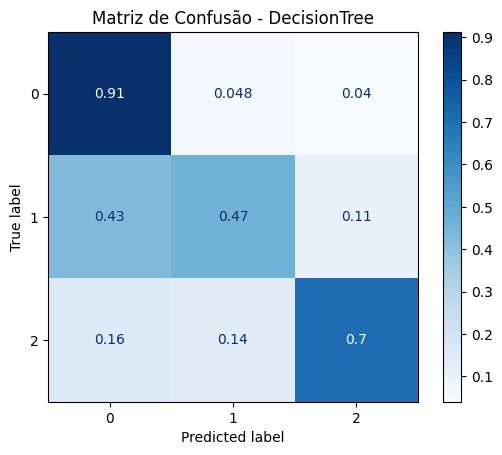

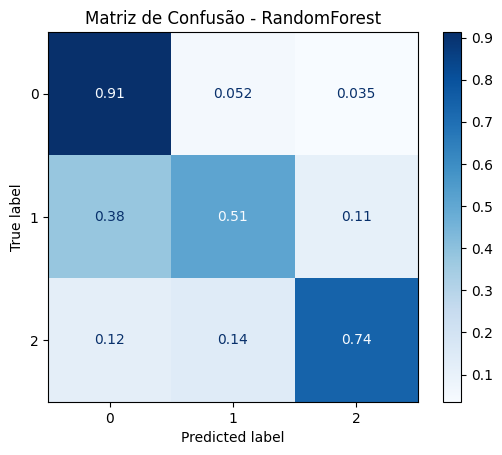

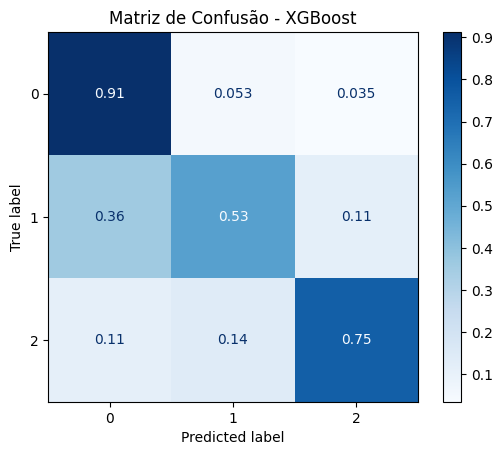

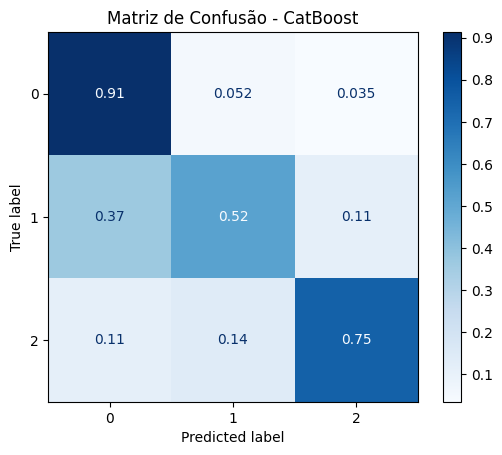

In [40]:

# Gerar matriz de confusão para cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    # Criar a matriz de confusão normalizada
    cm = confusion_matrix(y_test, y_pred, normalize='true')  # Normalização por linha
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    # Exibir a matriz de confusão
    disp.plot(cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()


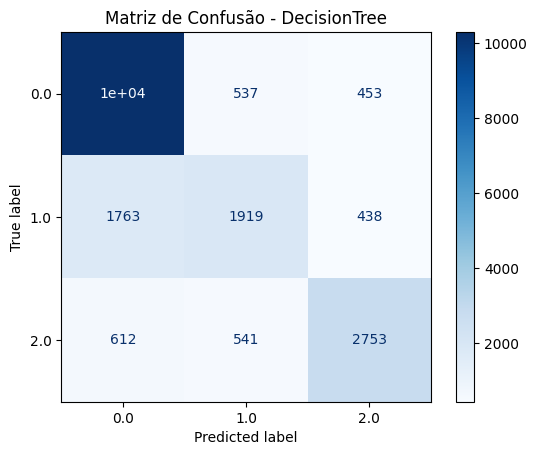

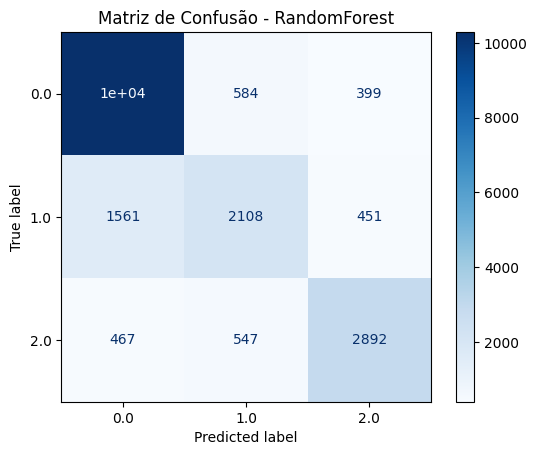

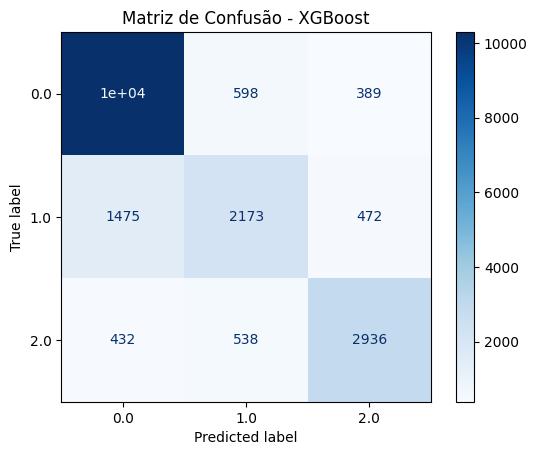

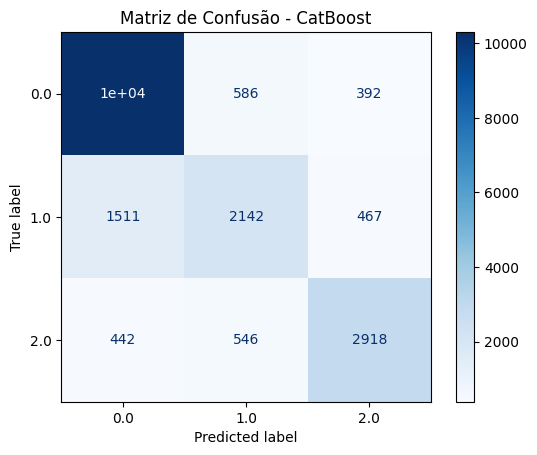

In [38]:
# Gerar matriz de confusão para cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

# 5. Análise da Importância das Features

In [41]:
import numpy as np
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

## Carregando as features em um dataframe e gerando gráfico apenas com as features com importância > 0.0

In [ ]:
import pandas as pd
from sklearn.inspection import permutation_importance

# Inicializar um DataFrame global para armazenar todas as importâncias
feature_importance_df = pd.DataFrame()

# Função para calcular e armazenar a importância para um modelo
def calcular_importancia(model, X_test, y_test, model_name):
    global feature_importance_df
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=5, random_state=42, n_jobs=-1)  # n_repeats reduzido e n_jobs adicionado
    
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    feature_importance_temp = pd.DataFrame({
        'Feature': X_test.columns,
        'Importância': importance_vals,
        'Desvio_Padrao': importance_std,
        'Modelo': model_name
    })
    
    # Concatenar uma única vez no final para melhorar a eficiência
    return feature_importance_temp

# Calcular importâncias para cada modelo
all_importances = []
all_importances.append(calcular_importancia(best_models['DecisionTree'], X_test, y_test, 'DecisionTree'))
all_importances.append(calcular_importancia(best_models['RandomForest'], X_test, y_test, 'RandomForest'))
all_importances.append(calcular_importancia(best_models['XGBoost'], X_test, y_test, 'XGBoost'))
all_importances.append(calcular_importancia(best_models['CatBoost'], X_test, y_test, 'CatBoost'))

# Concatenar todos os resultados de uma vez
feature_importance_df = pd.concat(all_importances, ignore_index=True)

# Visualizar o DataFrame com as importâncias de todos os modelos
print(feature_importance_df)


c:\Users\miche\Desktop\Boootcamp_Machine_Learning\Projeto_Final\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [58]:
feature_importance_df.head()

,Feature,Importância,Desvio_Padrao,Modelo
0,pct_idosos,0.182583,0.009223,DecisionTree
1,pct_deficientes,0.066667,0.007454,DecisionTree
2,qde_pessoas,0.030250,0.005015,DecisionTree
3,pct_criancas,0.005583,0.005603,DecisionTree
4,pct_empregado_com_carteira,0.075583,0.006423,DecisionTree


In [59]:
# Filtrar apenas as features com importância > 0
feature_importance_df = feature_importance_df[feature_importance_df['Importância'] > 0.0]

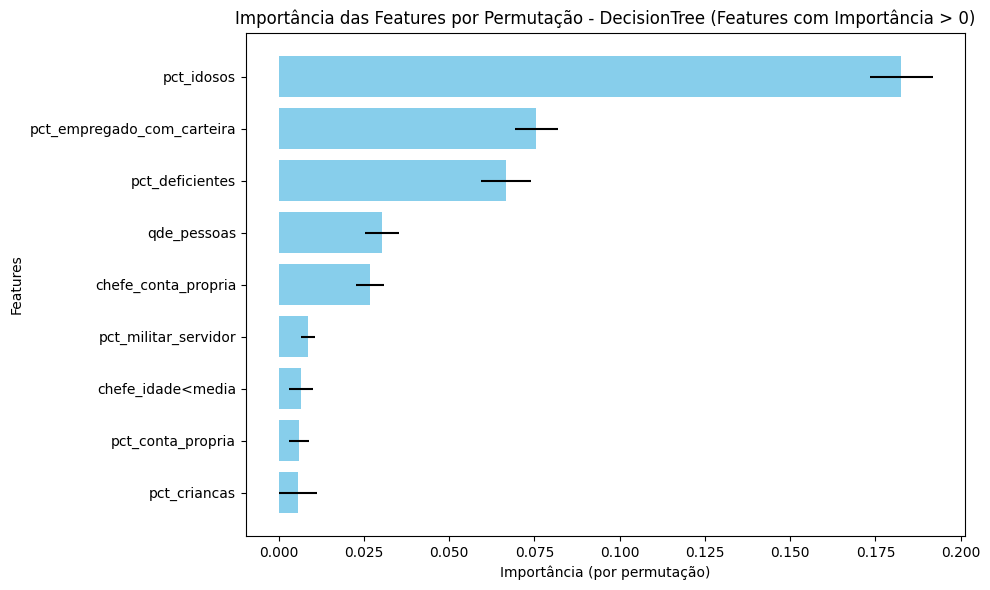

In [60]:
# Gerando um gráfico separado para cada modelo
# Filtrar e ordenar dados para o modelo DecisionTree
decision_tree_group = feature_importance_df[feature_importance_df['Modelo'] == 'DecisionTree']
decision_tree_group = decision_tree_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo DecisionTree
plt.figure(figsize=(10, 6))
plt.barh(decision_tree_group['Feature'], decision_tree_group['Importância'], 
         xerr=decision_tree_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - DecisionTree (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()



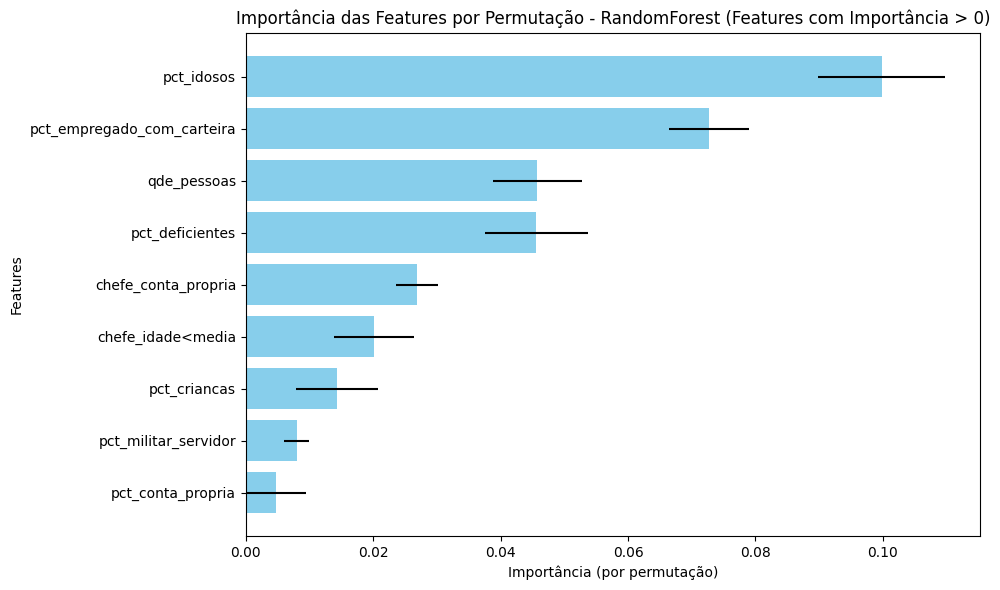

In [61]:
# Filtrar e ordenar dados para o modelo RandomForest
random_forest_group = feature_importance_df[feature_importance_df['Modelo'] == 'RandomForest']
random_forest_group = random_forest_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo RandomForest
plt.figure(figsize=(10, 6))
plt.barh(random_forest_group['Feature'], random_forest_group['Importância'], 
         xerr=random_forest_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - RandomForest (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


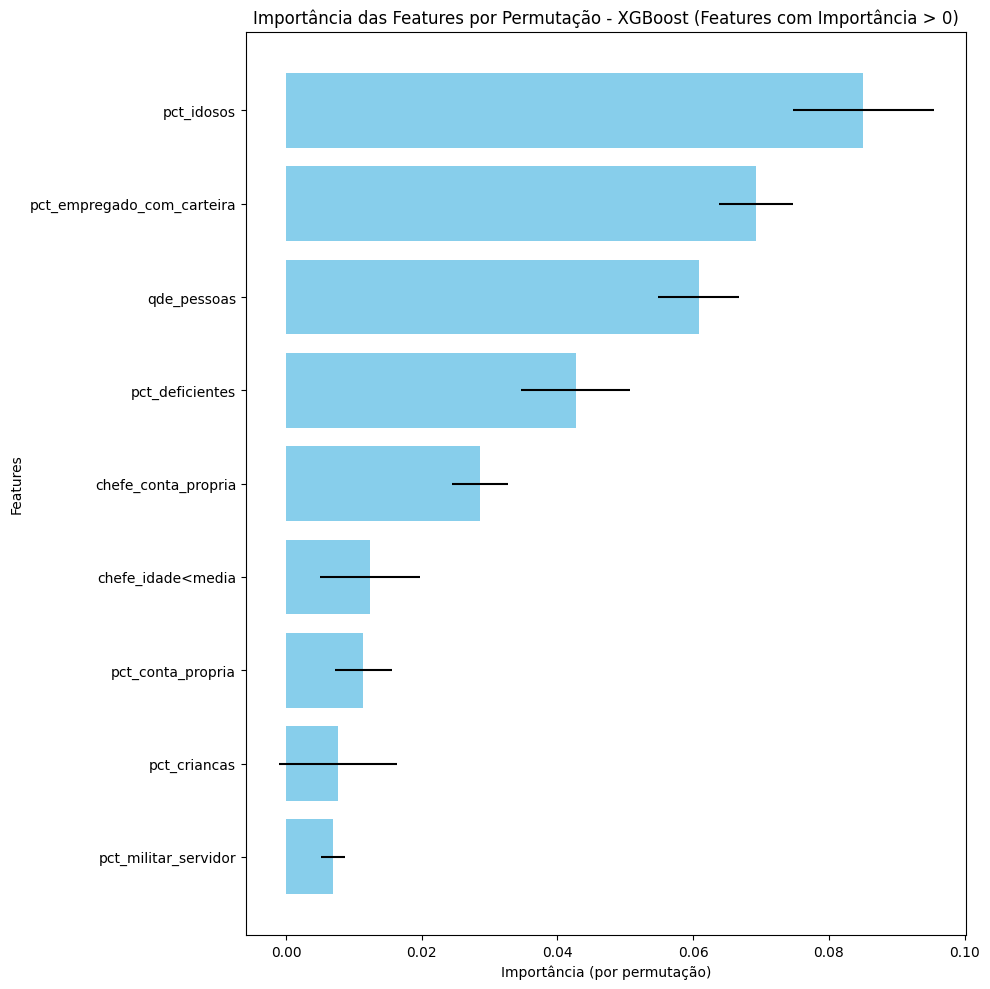

In [62]:
# Filtrar e ordenar dados para o modelo XGBoost
xgboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'XGBoost']
xgboost_group = xgboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo XGBoost
plt.figure(figsize=(10, 10))
plt.barh(xgboost_group['Feature'], xgboost_group['Importância'], 
         xerr=xgboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - XGBoost (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


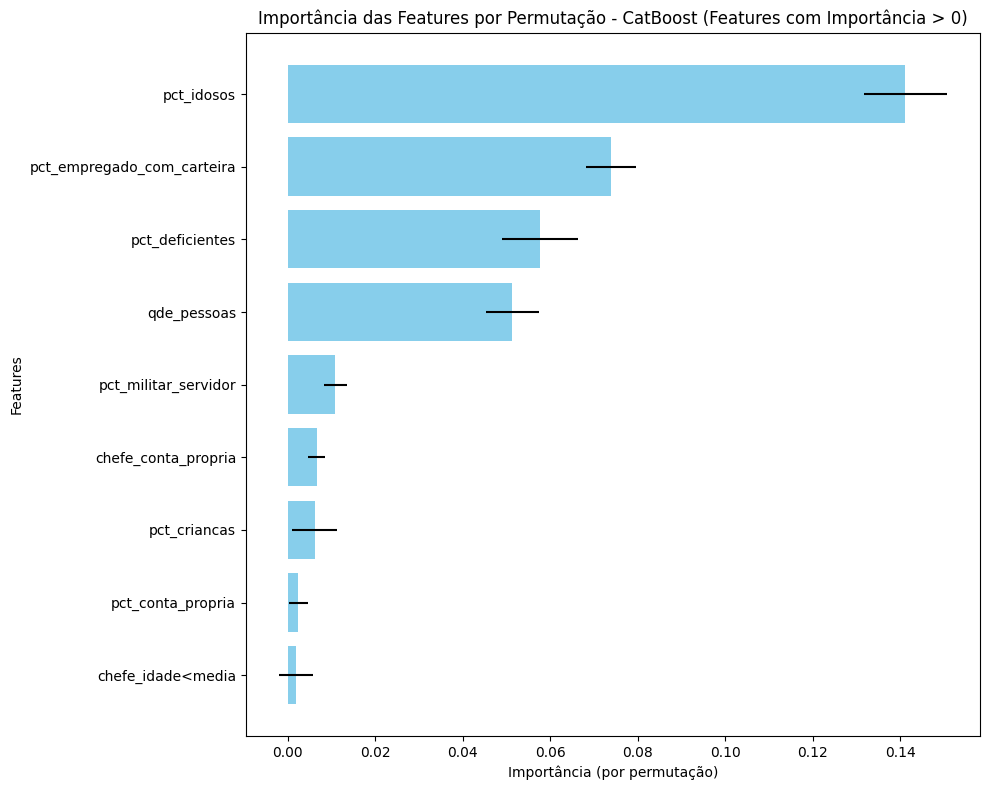

In [63]:
# Filtrar e ordenar dados para o modelo CatBoost
catboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'CatBoost']
catboost_group = catboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo CatBoost
plt.figure(figsize=(10, 8))
plt.barh(catboost_group['Feature'], catboost_group['Importância'], 
         xerr=catboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - CatBoost (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


In [64]:
# Lista para armazenar os 10 principais features de cada modelo
top_10_features_per_model = {}

# Obter os 10 principais features para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar e ordenar as features para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    model_group = model_group.sort_values(by='Importância', ascending=False).head(10)
    
    # Adicionar ao dicionário
    top_10_features_per_model[model_name] = model_group[['Feature', 'Importância']]

# Exibir os 10 principais features de cada modelo
for model_name, top_features in top_10_features_per_model.items():
    print(f"\nTop 10 Features para o modelo {model_name}:\n")
    print(top_features.to_string(index=False))


Top 10 Features para o modelo DecisionTree:

                   Feature  Importância
                pct_idosos     0.182583
pct_empregado_com_carteira     0.075583
           pct_deficientes     0.066667
               qde_pessoas     0.030250
       chefe_conta_propria     0.026833
      pct_militar_servidor     0.008500
         chefe_idade<media     0.006500
         pct_conta_propria     0.005917
              pct_criancas     0.005583

Top 10 Features para o modelo RandomForest:

                   Feature  Importância
                pct_idosos     0.099833
pct_empregado_com_carteira     0.072667
               qde_pessoas     0.045750
           pct_deficientes     0.045583
       chefe_conta_propria     0.026833
         chefe_idade<media     0.020167
              pct_criancas     0.014333
      pct_militar_servidor     0.008000
         pct_conta_propria     0.004750

Top 10 Features para o modelo XGBoost:

                   Feature  Importância
                pct_idosos 